In [5]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
import requests
from bs4 import BeautifulSoup
import matplotlib.dates as mdates

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

plt.style.use('ggplot')

## Data loading

In [6]:
ticker = 'AAPL'

news = yf.Ticker(ticker).news

news_dict = {}

for article in tqdm(news):
    # Time information
    timestamp = article['providerPublishTime']
    datetime = dt.datetime.fromtimestamp(timestamp)
    
    # News text
    response = requests.get(article['link'])
    soup = BeautifulSoup(response.text, 'html.parser')

    article_text = ""
    for paragraph in soup.find_all('p'):
        article_text += paragraph.get_text() + "\n"

    news_dict[datetime] = [
        article['title'], 
        article['link'],
        article_text,
    ]

df = pd.DataFrame(news_dict, index=['Title', 'Link', 'Text']).T

display(df)

  0%|          | 0/8 [00:00<?, ?it/s]

,Title,Link,Text
2023-11-02 06:15:00,AI Is About to Remake the PC. These 2 Stocks C...,https://finance.yahoo.com/m/56f79aad-15cb-31e1...,Thank you for your patience.\nOur engineers ar...
2023-11-02 06:01:33,Dow Jones Futures: Market Rally Gains Steam On...,https://finance.yahoo.com/m/6b3e9206-b9ba-3782...,Thank you for your patience.\nOur engineers ar...
2023-11-02 06:00:00,Apple Earnings Will Be Scoured for News on iPh...,https://finance.yahoo.com/m/5ec37a65-227c-3ade...,Apple reports financial results for the Septem...
2023-11-02 05:05:01,India probing iPhone hacking complaints by opp...,https://finance.yahoo.com/news/india-probing-i...,(Corrects first name of minister in first para...
2023-11-02 04:59:31,CORRECTED-India probing iPhone hacking complai...,https://finance.yahoo.com/news/india-probing-i...,"NEW DELHI, Nov 2 (Reuters) - India's cyber sec..."
2023-11-02 04:59:00,"Berkshire Should Show a Loss, but Operating Pr...",https://finance.yahoo.com/m/02f997ee-2f04-370f...,Thank you for your patience.\nOur engineers ar...
2023-11-01 22:17:08,Qualcomm has a big opportunity in PC market: A...,https://finance.yahoo.com/video/qualcomm-big-o...,Thank you for your patience.\nOur engineers ar...
2023-11-01 22:12:06,"Apple earnings, Jamie Dimon interview: What to...",https://finance.yahoo.com/video/apple-earnings...,Thank you for your patience.\nOur engineers ar...


## Sentiment score

In [7]:
sia = SentimentIntensityAnalyzer()

res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = i
    res[myid] = sia.polarity_scores(text)

vaders = pd.DataFrame(res).T

result_df = pd.concat([df, vaders], axis=1)

display(result_df) 
    

  0%|          | 0/8 [00:00<?, ?it/s]

,Title,Link,Text,neg,neu,pos,compound
2023-11-02 06:15:00,AI Is About to Remake the PC. These 2 Stocks C...,https://finance.yahoo.com/m/56f79aad-15cb-31e1...,Thank you for your patience.\nOur engineers ar...,0.000,0.702,0.298,0.6249
2023-11-02 06:01:33,Dow Jones Futures: Market Rally Gains Steam On...,https://finance.yahoo.com/m/6b3e9206-b9ba-3782...,Thank you for your patience.\nOur engineers ar...,0.000,0.702,0.298,0.6249
2023-11-02 06:00:00,Apple Earnings Will Be Scoured for News on iPh...,https://finance.yahoo.com/m/5ec37a65-227c-3ade...,Apple reports financial results for the Septem...,0.000,0.863,0.137,0.8271
2023-11-02 05:05:01,India probing iPhone hacking complaints by opp...,https://finance.yahoo.com/news/india-probing-i...,(Corrects first name of minister in first para...,0.064,0.897,0.039,-0.7934
2023-11-02 04:59:31,CORRECTED-India probing iPhone hacking complai...,https://finance.yahoo.com/news/india-probing-i...,"NEW DELHI, Nov 2 (Reuters) - India's cyber sec...",0.070,0.887,0.043,-0.7934
2023-11-02 04:59:00,"Berkshire Should Show a Loss, but Operating Pr...",https://finance.yahoo.com/m/02f997ee-2f04-370f...,Thank you for your patience.\nOur engineers ar...,0.000,0.702,0.298,0.6249
2023-11-01 22:17:08,Qualcomm has a big opportunity in PC market: A...,https://finance.yahoo.com/video/qualcomm-big-o...,Thank you for your patience.\nOur engineers ar...,0.000,0.702,0.298,0.6249
2023-11-01 22:12:06,"Apple earnings, Jamie Dimon interview: What to...",https://finance.yahoo.com/video/apple-earnings...,Thank you for your patience.\nOur engineers ar...,0.000,0.702,0.298,0.6249


# Compare with stock price


1 Failed download:
['AAPL']: IndexError('index 0 is out of bounds for axis 0 with size 0')
C:\Users\joneh\AppData\Local\Temp\ipykernel_30752\3090842914.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


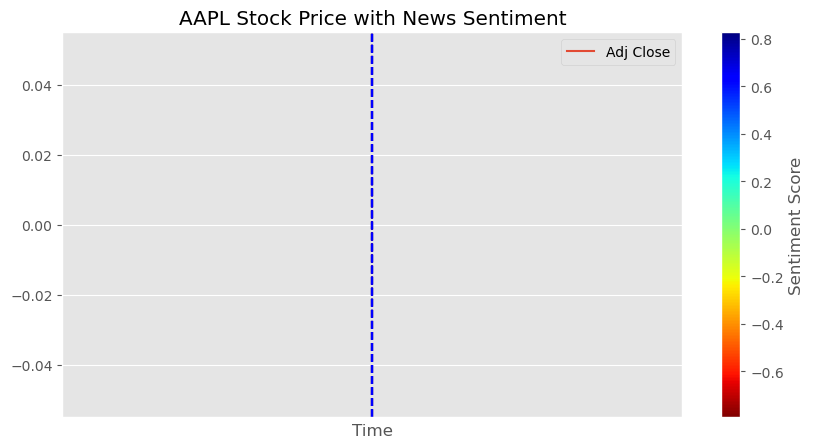

In [8]:

start = result_df.index.min()
end = result_df.index.max()

stock_data = yf.download(
    ticker, 
    start=start,
    end=end,
    interval='1h',
    progress=False
)[['Adj Close']]

cmap = plt.get_cmap('jet_r')
norm = plt.Normalize(result_df['compound'].min(), result_df['compound'].max()) 

fig, ax = plt.subplots(figsize=(10, 5))

stock_data.plot(xlabel='Time', ax=ax)

for i, row in result_df.iterrows():
    color = cmap(norm(row['compound']))
    ax.axvline(x=i, color=color, linestyle='--')

ax.set_title(f'{ticker} Stock Price with News Sentiment')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Create an empty array for the colorbar
cbar = plt.colorbar(sm)
cbar.set_label('Sentiment Score')